# 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
# 生成X的第1个特征为第0个特征的某种线性关系再加点噪音
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

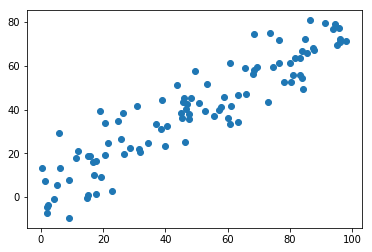

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## demean操作

In [7]:
def demean(X):
    """
    所有样本减去均值
    :param X: 
    :return: 
    """
    return X - np.mean(X, axis=0)

In [8]:
X_demean = demean(X)

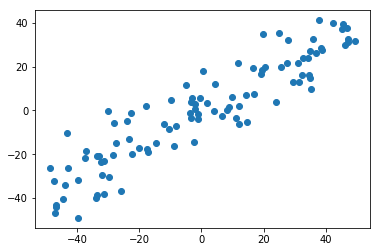

In [9]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [10]:
np.mean(X_demean, axis=0)

array([  2.03925765e-14,  -7.03437308e-15])

可以看到，demean之后，均值非常接近0

## 使用梯度上升法

In [11]:
def f(w, X):
    """
    效用函数
    :param w: 
    :param X:   demean后的X 
    :return: 
    """
    return np.sum((X.dot(w))**2) / len(X)

In [12]:
def df_math(w,X):
    """
    给定w，X，求梯度
    :param w: 
    :param X: demean后的X
    :return: 
    """
    return X.T.dot(X.dot(w)) * 2. / len(X)

### 验证一下这个梯度函数是否正确

In [13]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w_2,X)) / (2*epsilon)
    return res


#### 梯度上升法

In [16]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)    # 注意1： 每次求一个单位方向
        if (abs(f(w,X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [17]:
# 初始值不可以是0向量 ！
initial_w = np.random.random(X.shape[1])
initial_w

array([ 0.36141063,  0.13370123])

In [18]:
eta = 0.001

#### 注意，不能使用Standard Scaler标准化数据

In [21]:
%time gradient_ascent(df_debug, X_demean, initial_w, eta)

CPU times: user 2.21 ms, sys: 2 ms, total: 4.21 ms
Wall time: 2.51 ms


array([ 0.78614633,  0.61804042])

In [22]:
%time gradient_ascent(df_math, X_demean, initial_w, eta)

CPU times: user 849 µs, sys: 13 µs, total: 862 µs
Wall time: 871 µs


array([ 0.78614633,  0.61804042])

#### 把这条轴画出来看看

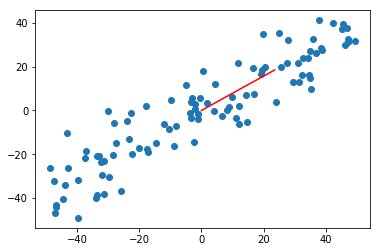

In [23]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

#### 一种极端的情况？

In [27]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0., 100., size=100)
# 生成X的第1个特征为第0个特征的某种线性关系再加点噪音
X2[:,1] = 0.75 * X2[:,0] + 3.

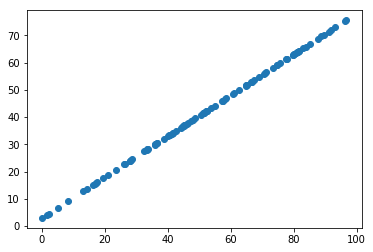

In [28]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [29]:
X2_demean = demean(X2)

In [30]:
gradient_ascent(df_math, X2_demean, initial_w, eta)

array([ 0.80000059,  0.59999922])

w向量就是(0.8,0.6)这个点，这个点与原点之间的连线，斜率刚好是0.75，结果正确

In [31]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

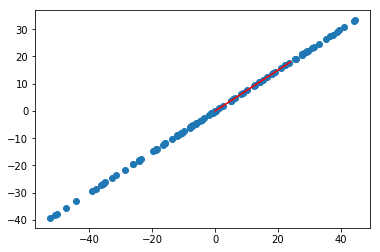

In [33]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()